In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import statsmodels.stats.api as sms

import warnings
warnings.filterwarnings('ignore')

In [3]:
jm_data = pd.read_csv('/content/sample_data/Jamboree_Admission.csv')
df = jm_data.copy()
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [4]:
df = df.rename(columns={'Chance of Admit ': 'Chance_of_Admit'})

In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.cov()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,20875.000000,-169.458918,-124.511022,-11.175351,-19.666333,-0.493988,-6.491703,-0.382766,0.173437
GRE Score,-169.458918,127.580377,56.825026,8.206605,6.867206,5.484521,5.641944,3.162004,1.291862
TOEFL Score,-124.511022,56.825026,36.989114,4.519150,3.883960,3.048168,2.981607,1.411303,0.680046
University Rating,-11.175351,8.206605,4.519150,1.307619,0.825014,0.644112,0.487761,0.242645,0.111384
SOP,-19.666333,6.867206,3.883960,0.825014,0.982088,0.608701,0.426845,0.200962,0.095691
LOR,-0.493988,5.484521,3.048168,0.644112,0.608701,0.856457,0.356807,0.171303,0.084296
CGPA,-6.491703,5.641944,2.981607,0.487761,0.426845,0.356807,0.365799,0.150655,0.075326
Research,-0.382766,3.162004,1.411303,0.242645,0.200962,0.171303,0.150655,0.246894,0.038282
Chance_of_Admit,0.173437,1.291862,0.680046,0.111384,0.095691,0.084296,0.075326,0.038282,0.019921


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance_of_Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [9]:
df = df.drop(columns='Serial No.')
df.sample()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
395,324,110,3,3.5,3.5,9.04,1,0.82


In [10]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

Duplicated Detection

In [11]:
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit


#Insights

The dataset does not contain any duplicates.

Null Detection

In [12]:
df.isna().any()

,0
GRE Score,False
TOEFL Score,False
University Rating,False
SOP,False
LOR,False
CGPA,False
Research,False
Chance_of_Admit,False


In [13]:
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance_of_Admit,0


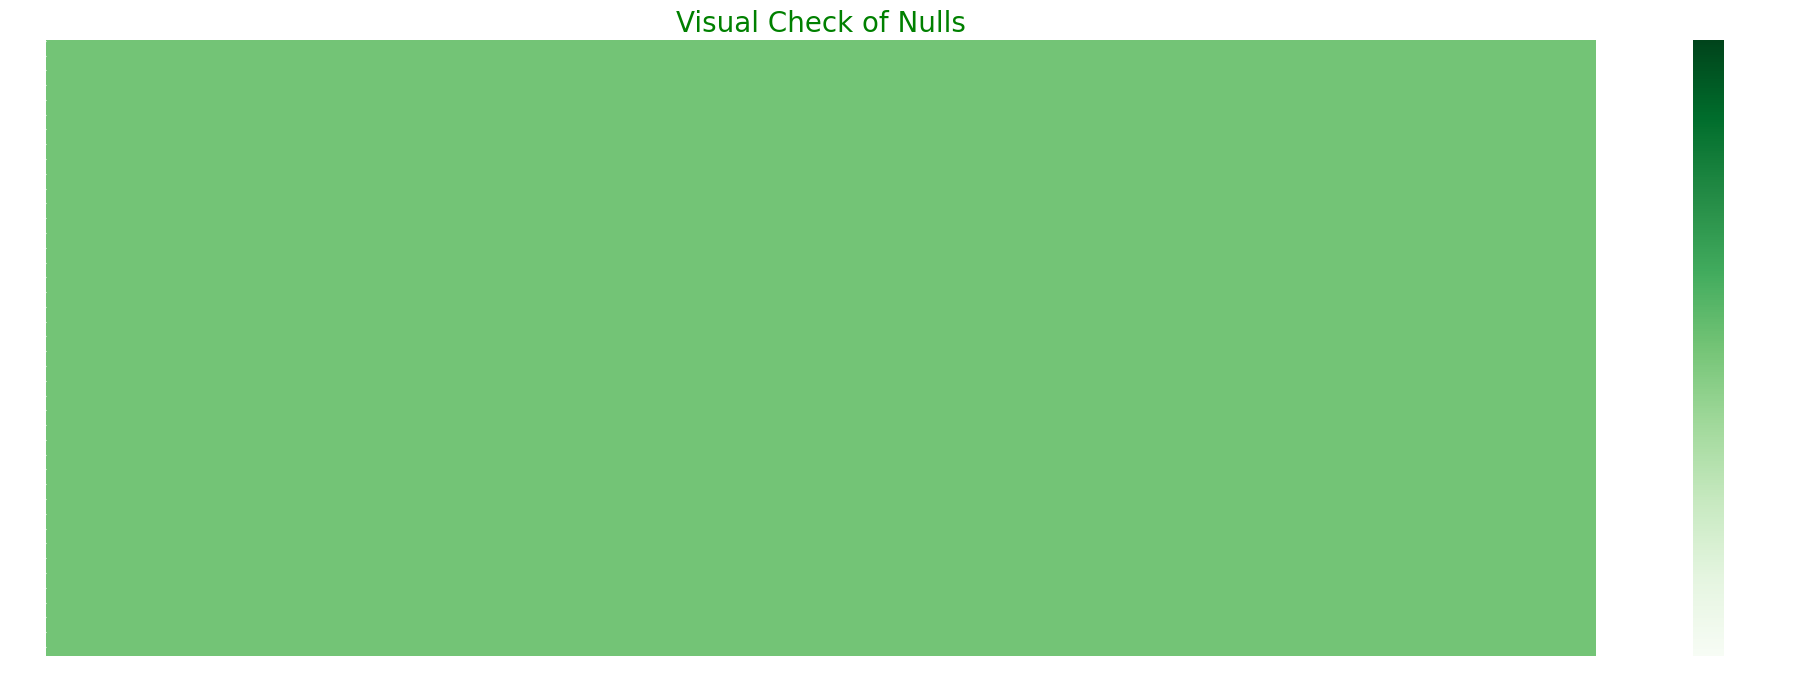

In [14]:
plt.figure(figsize=(25,8))
plt.style.use('dark_background')
sns.heatmap(df.isnull(),cmap='Greens')
plt.title('Visual Check of Nulls',fontsize=20,color='g')
plt.show()

In [15]:
for _ in df.columns:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Value counts in {_} column are :-\n {df[_].value_counts(normalize=True)}')
    print()
    print('-'*120)


Total Unique Values in GRE Score column are :- 49
Value counts in GRE Score column are :-
 GRE Score
312    0.048
324    0.046
316    0.036
321    0.034
322    0.034
327    0.034
311    0.032
320    0.032
314    0.032
317    0.030
325    0.030
315    0.026
308    0.026
323    0.026
326    0.024
319    0.024
313    0.024
304    0.024
300    0.024
318    0.024
305    0.022
301    0.022
310    0.022
307    0.020
329    0.020
299    0.020
298    0.020
331    0.018
340    0.018
328    0.018
309    0.018
334    0.016
332    0.016
330    0.016
306    0.014
302    0.014
297    0.012
296    0.010
295    0.010
336    0.010
303    0.010
338    0.008
335    0.008
333    0.008
339    0.006
337    0.004
290    0.004
294    0.004
293    0.002
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in TOEFL Score column are :- 29
Value counts in TOEFL Score column are :-
 TOEFL Scor

In [16]:
for _ in df.columns:
    print()
    print(f'Range of {_} column is from {df[_].min()} to {df[_].max()}')
    print()
    print('-'*120)


Range of GRE Score column is from 290 to 340

------------------------------------------------------------------------------------------------------------------------

Range of TOEFL Score column is from 92 to 120

------------------------------------------------------------------------------------------------------------------------

Range of University Rating column is from 1 to 5

------------------------------------------------------------------------------------------------------------------------

Range of SOP column is from 1.0 to 5.0

------------------------------------------------------------------------------------------------------------------------

Range of LOR  column is from 1.0 to 5.0

------------------------------------------------------------------------------------------------------------------------

Range of CGPA column is from 6.8 to 9.92

------------------------------------------------------------------------------------------------------------------------

R

In [17]:
df.dtypes

,0
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance_of_Admit,float64



📈Graphical Analysis:

In [18]:
cp = 'Greens'

In [19]:
pip install matplotlib==3.7.2 seaborn==0.12.2

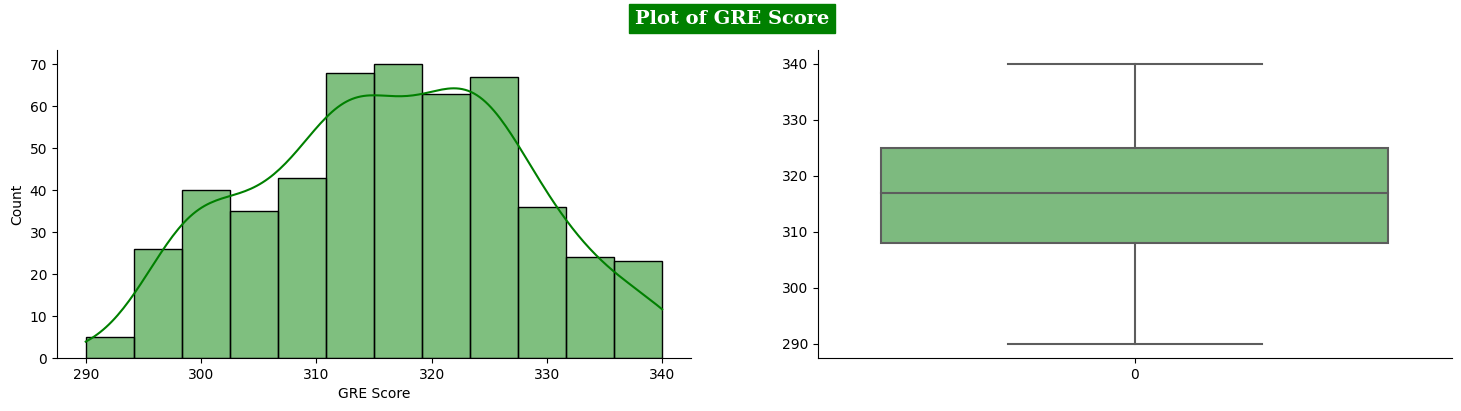

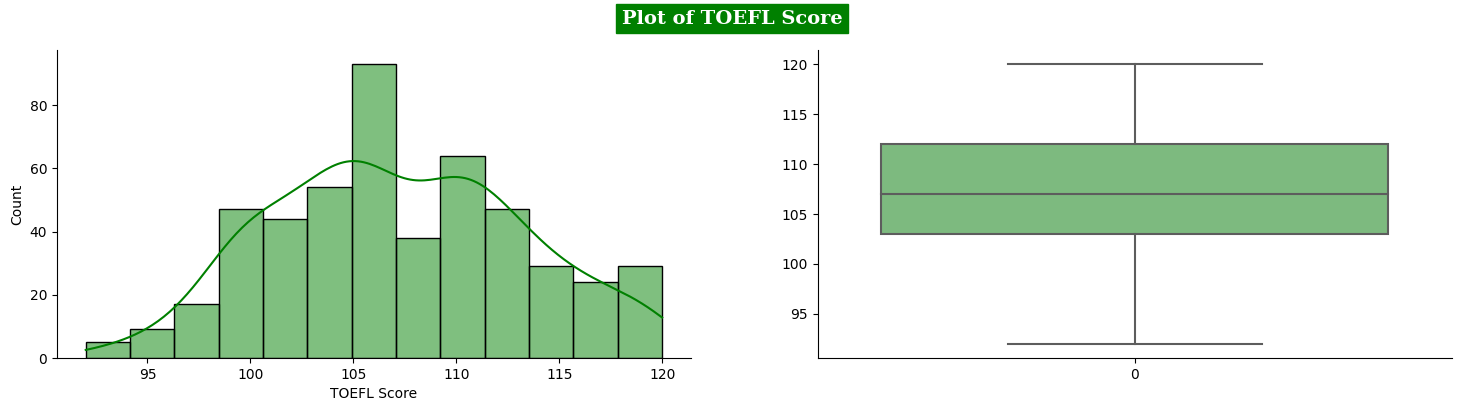

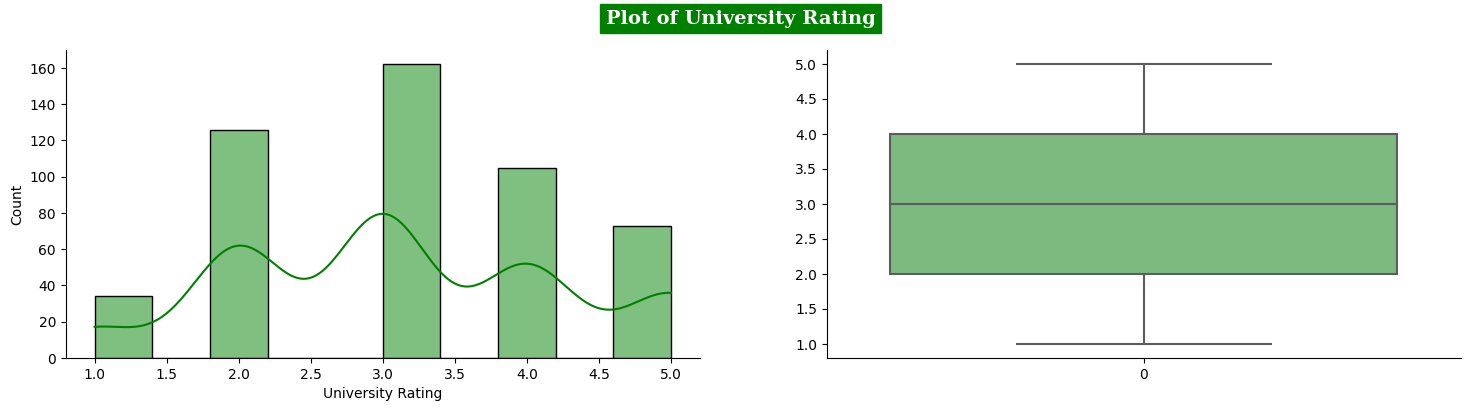

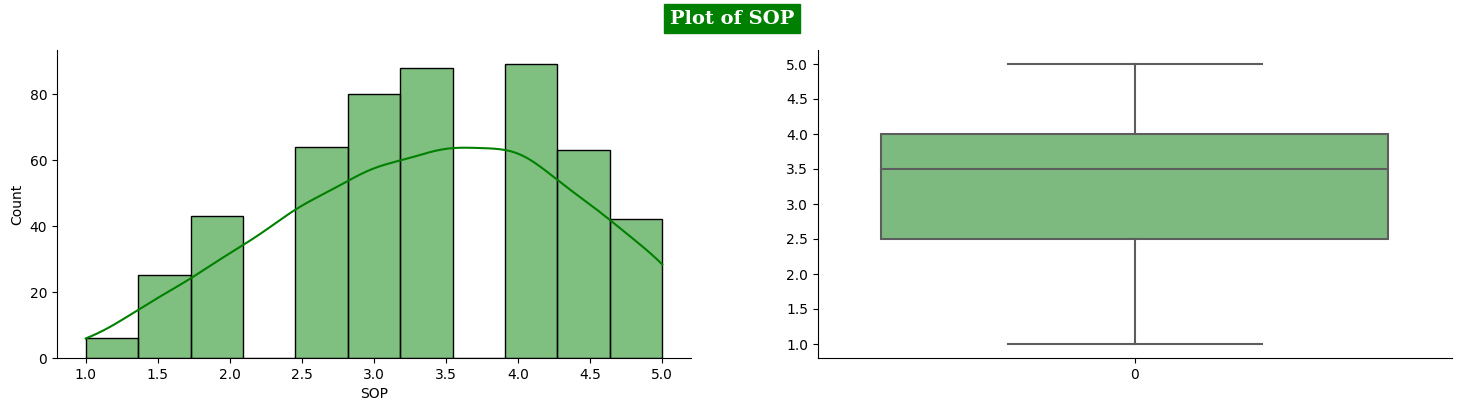

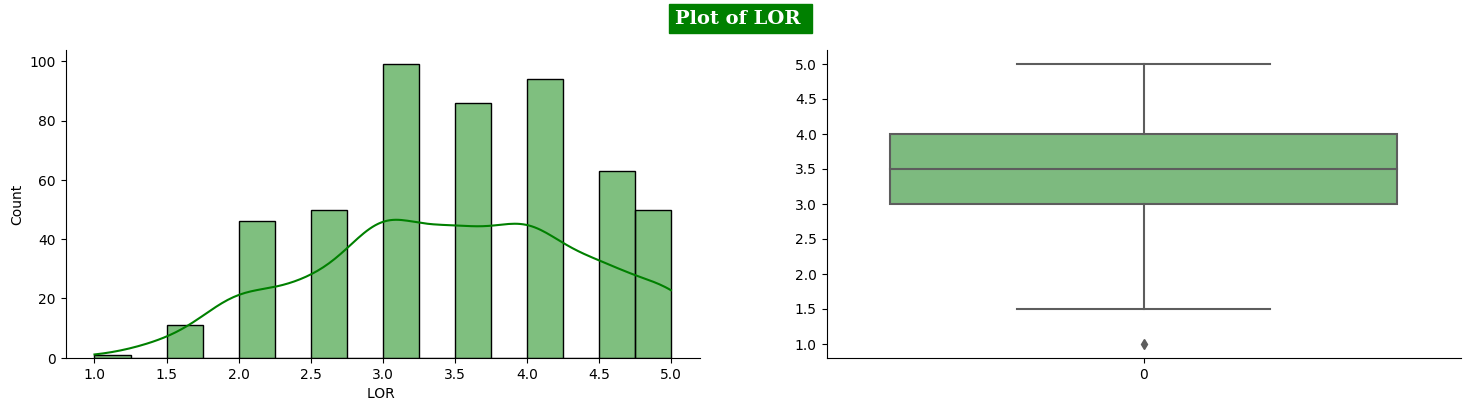

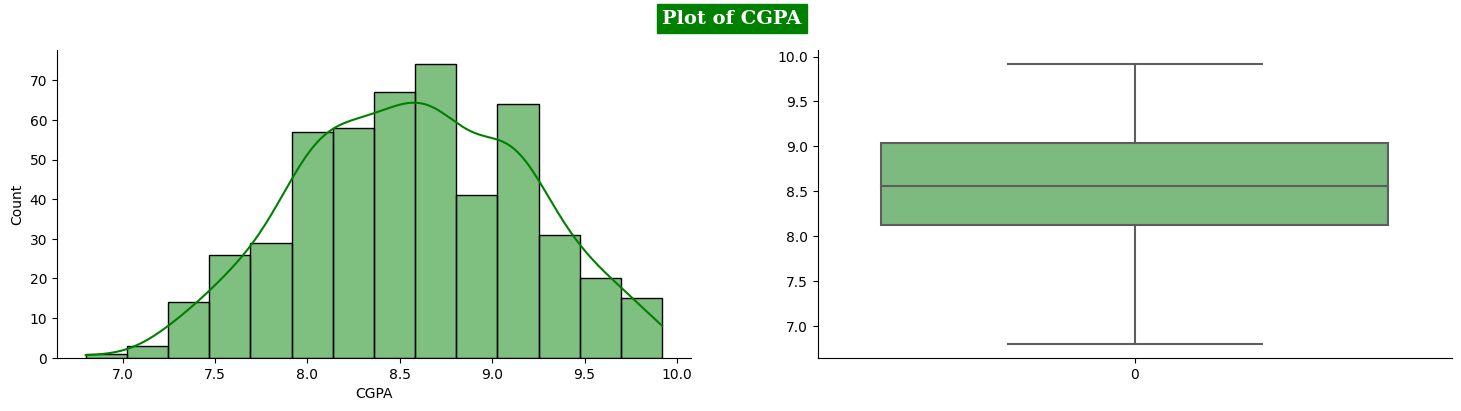

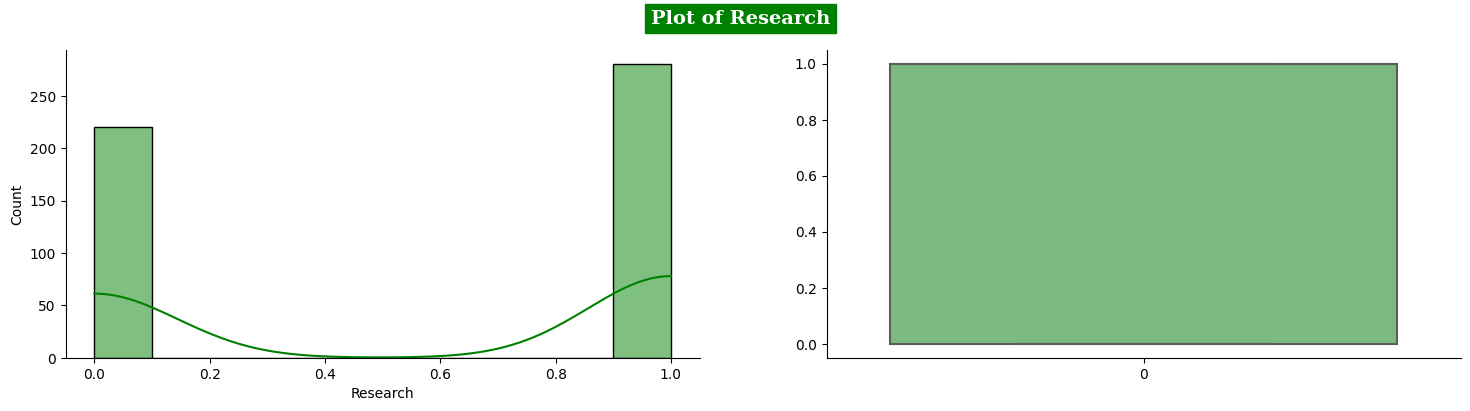

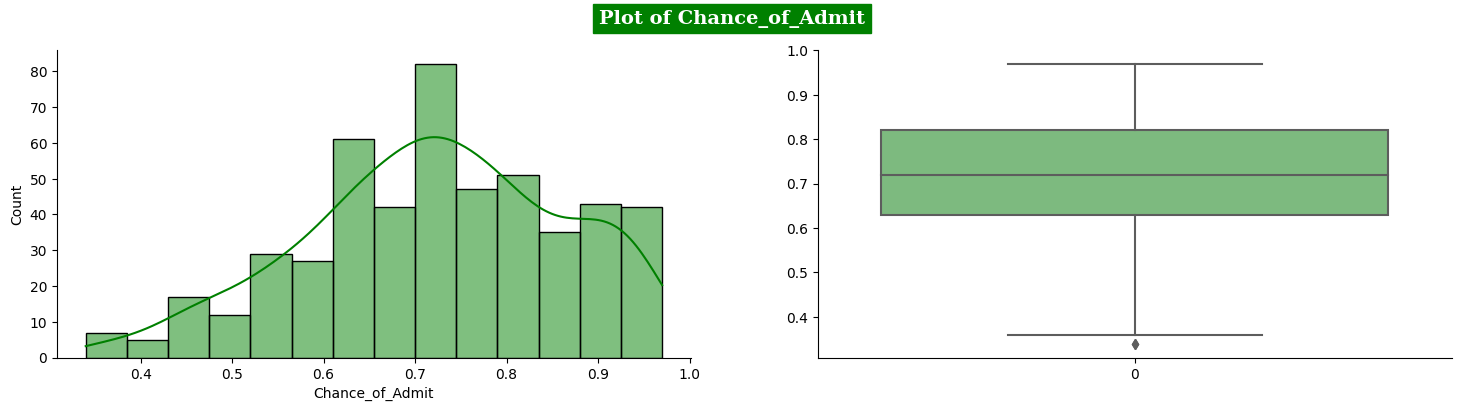

In [20]:
for _ in df.columns:
    plt.style.use('default')
    plt.style.use('seaborn-bright')
    plt.figure(figsize = (18,4))
    plt.subplot(122)
    sns.boxplot(df[_],palette=cp)
    plt.subplot(121)
    sns.histplot(df[_],kde=True,color='g')
    plt.suptitle(f'Plot of {_}',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    sns.despine()
    plt.show()

Insight
Other than LOR there no outliers found in other features. And there is no need for treating LOR as it is one of the ratings given on scale 0-5.

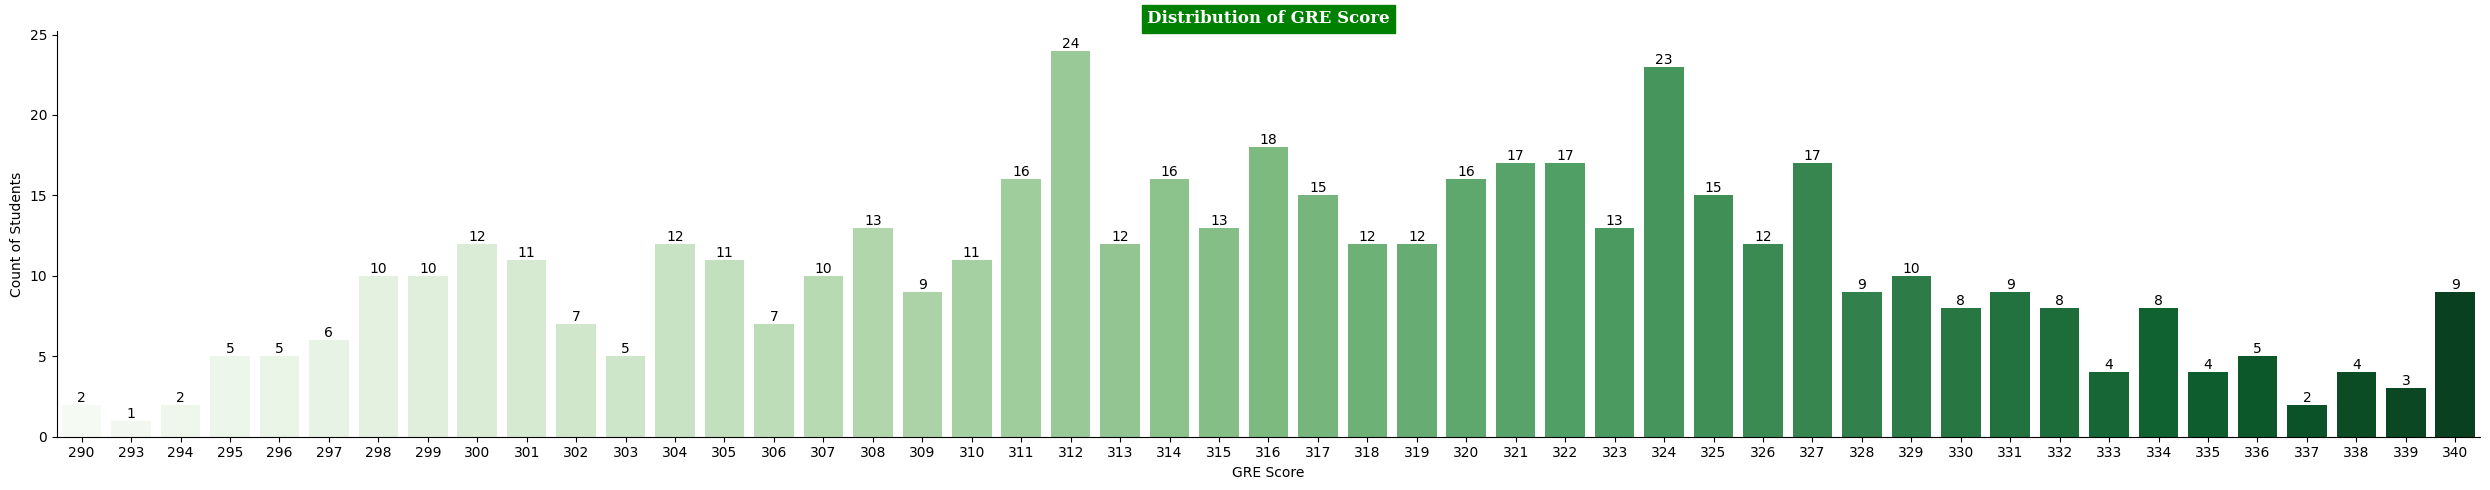

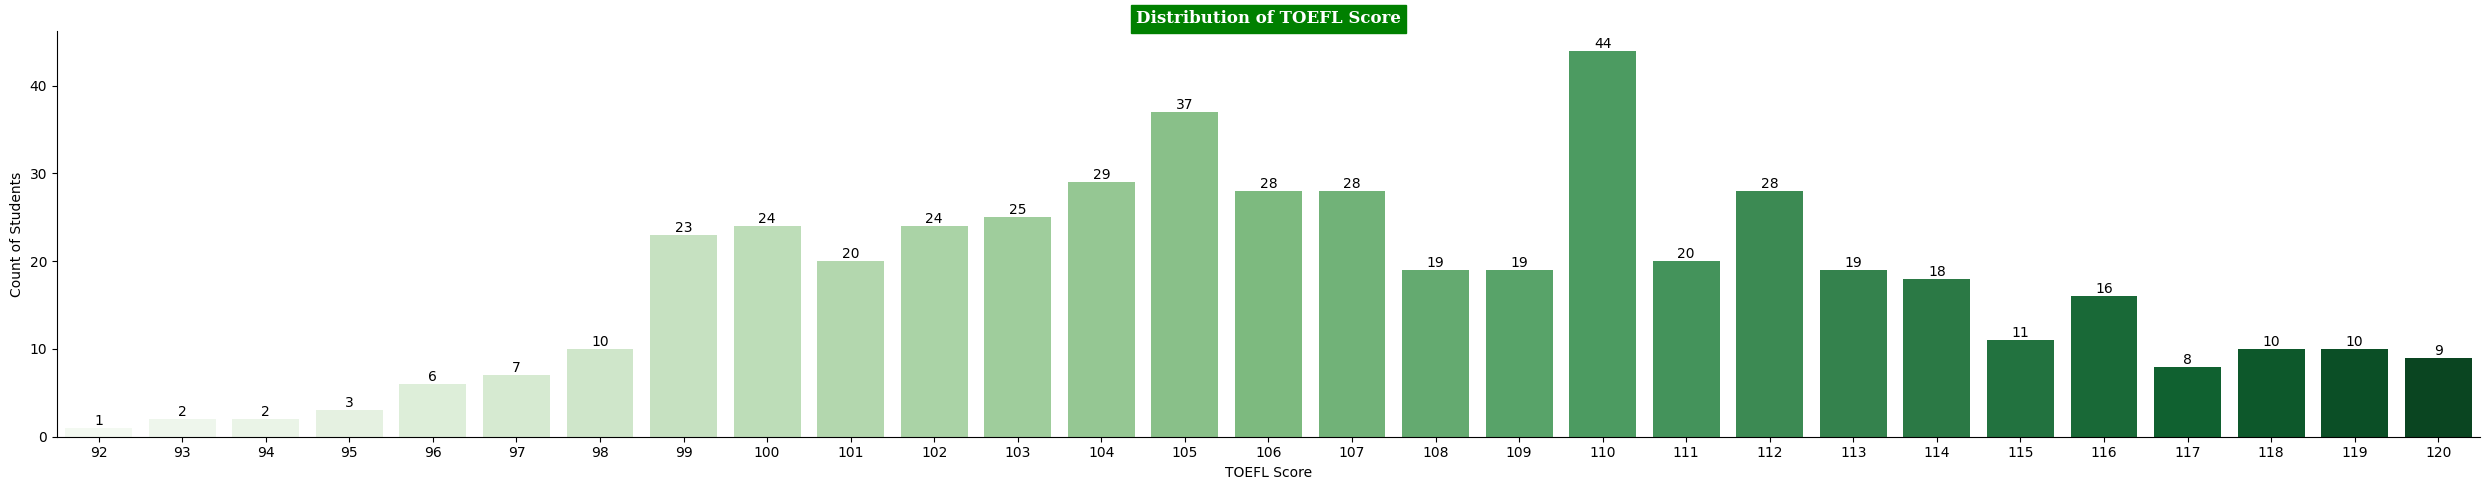

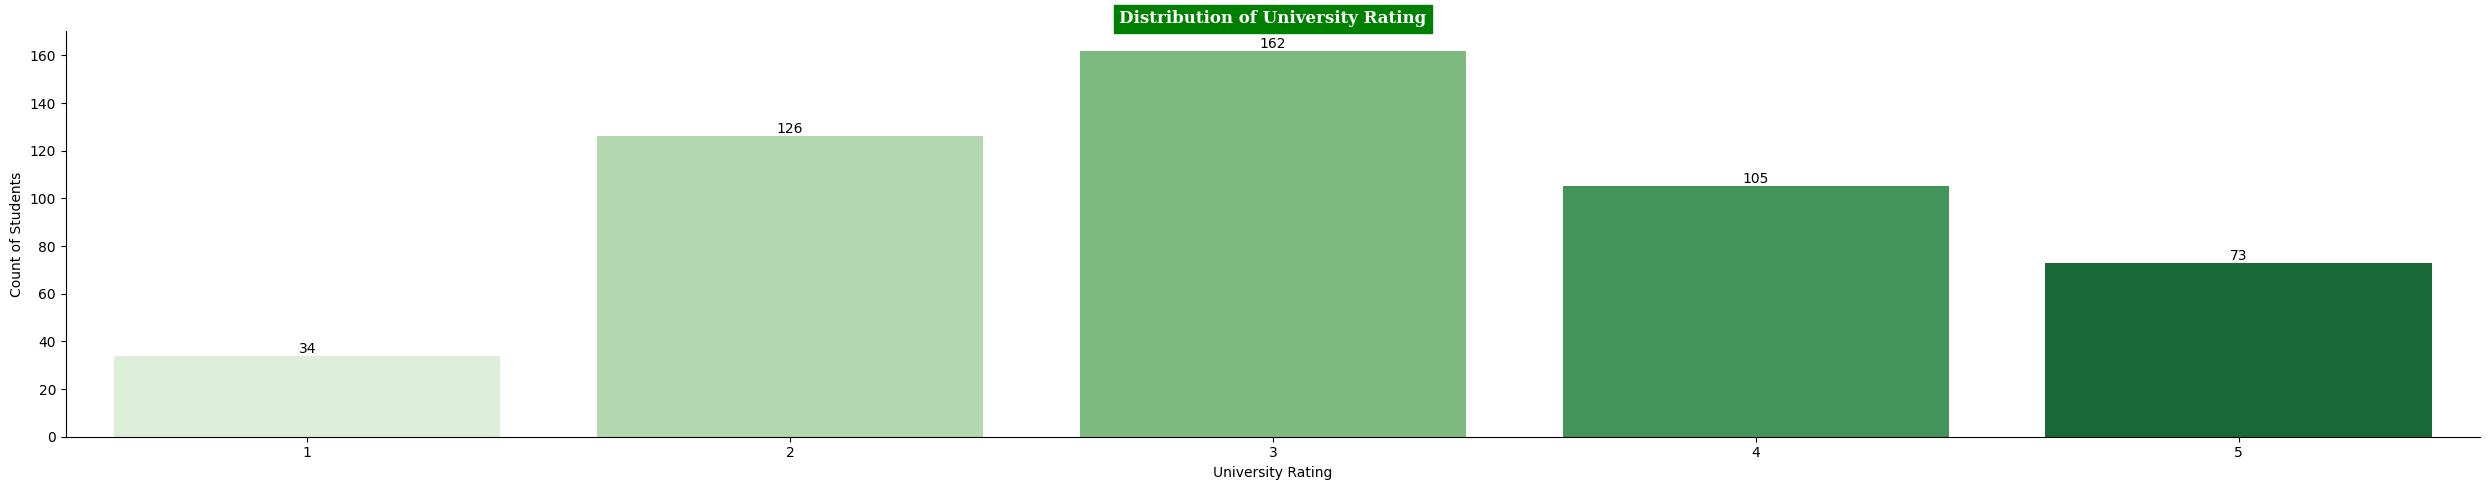

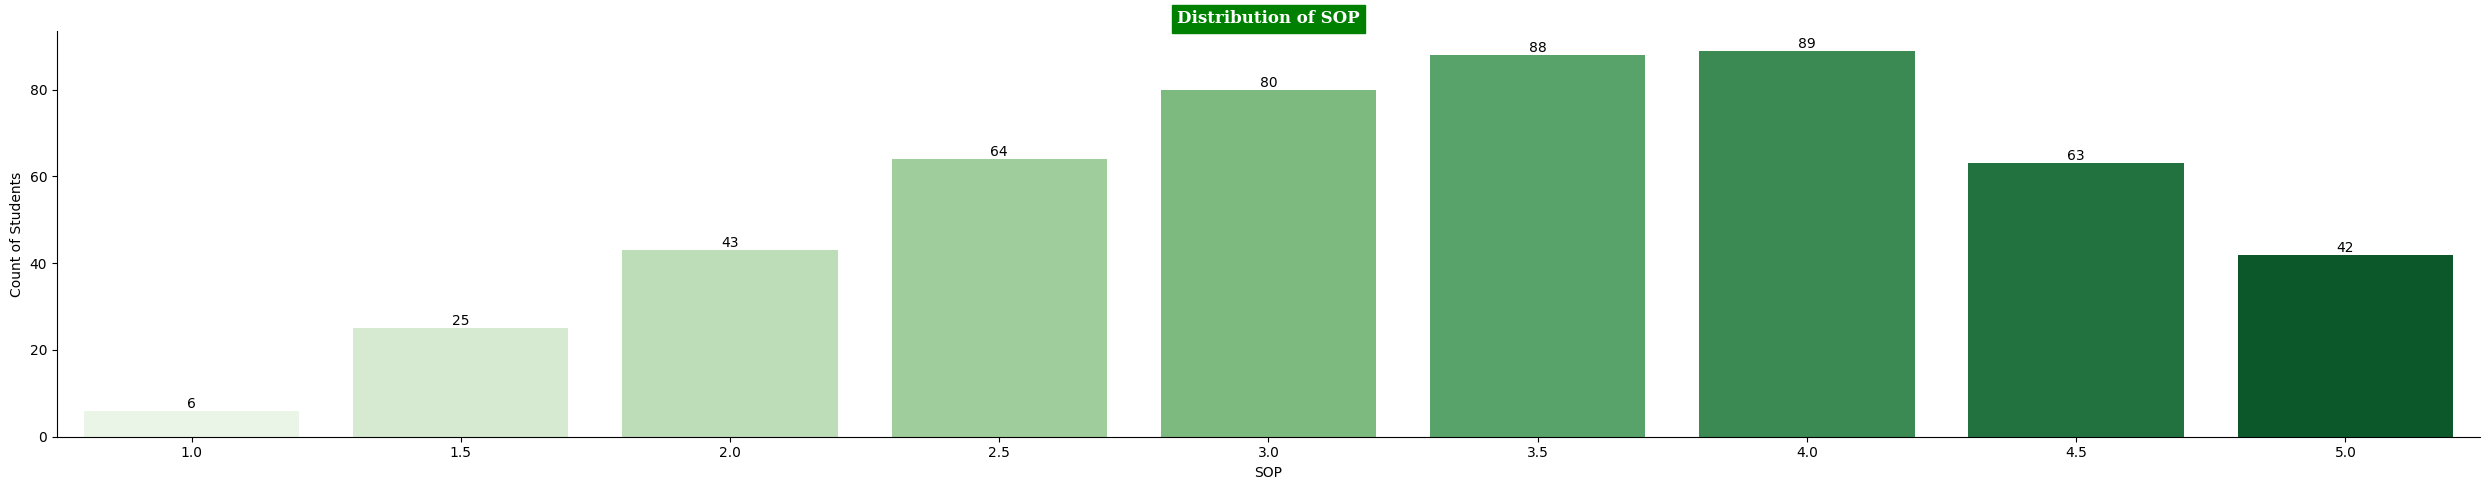

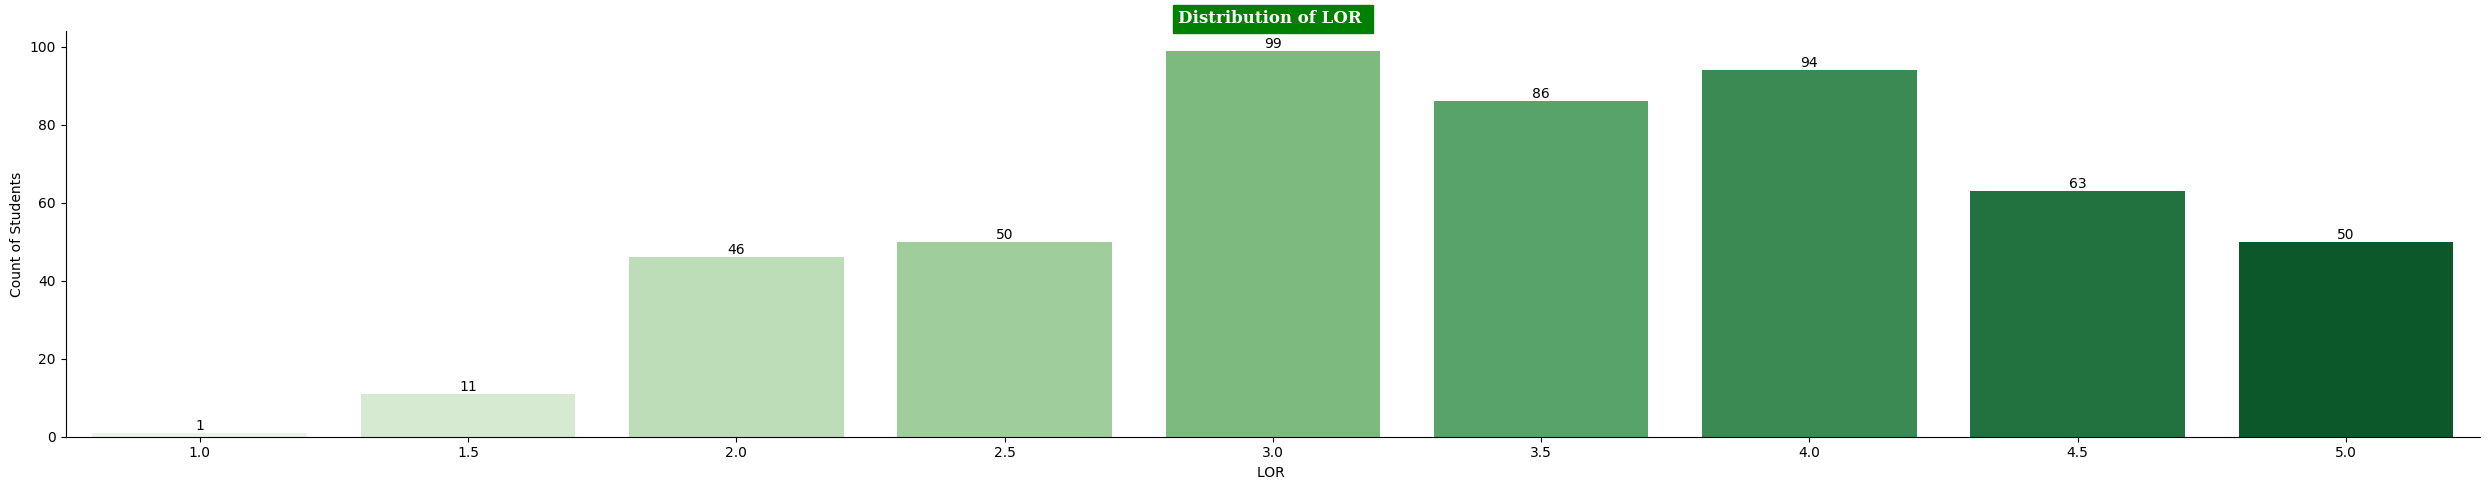

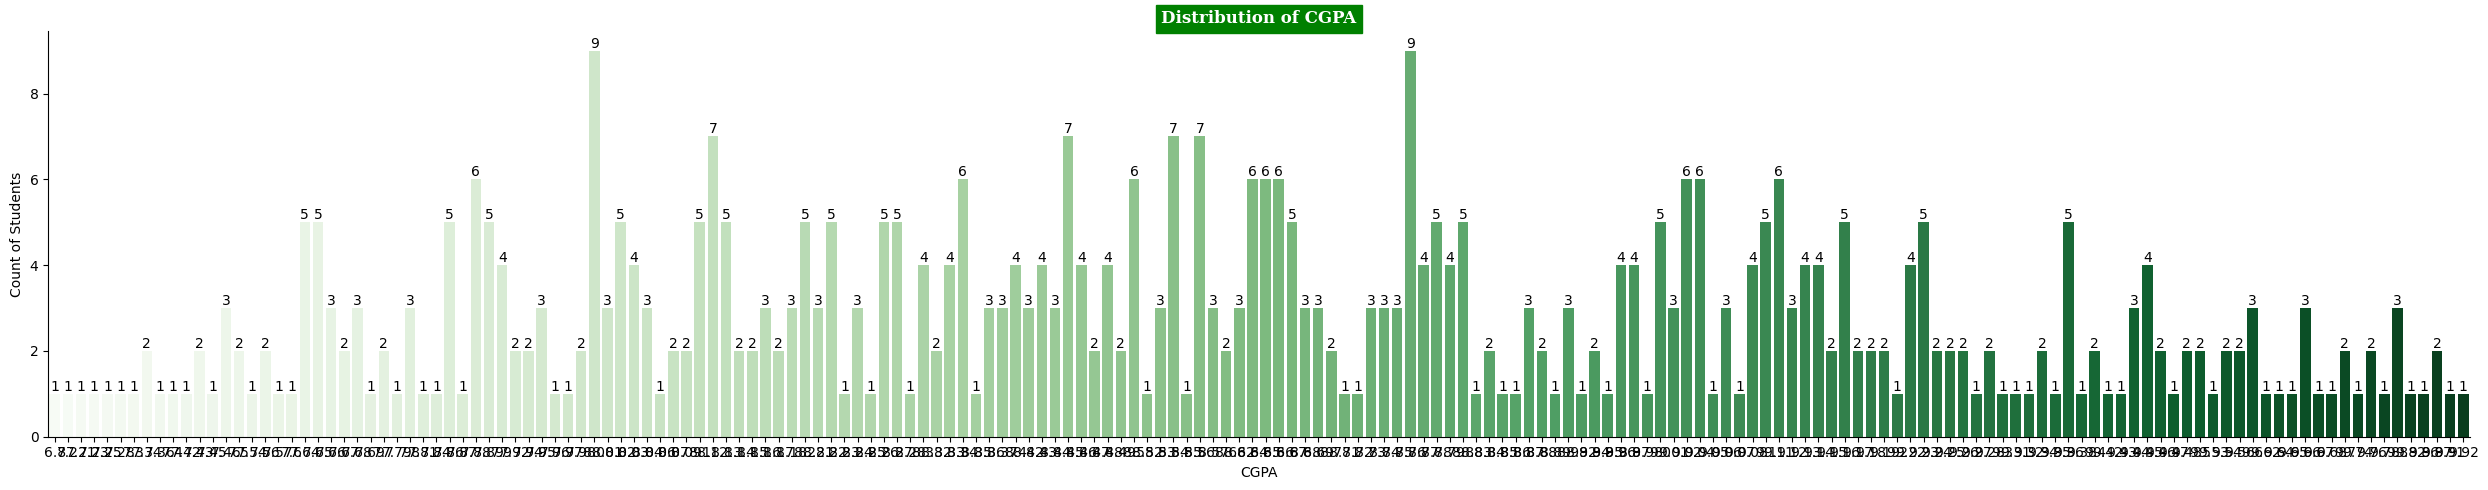

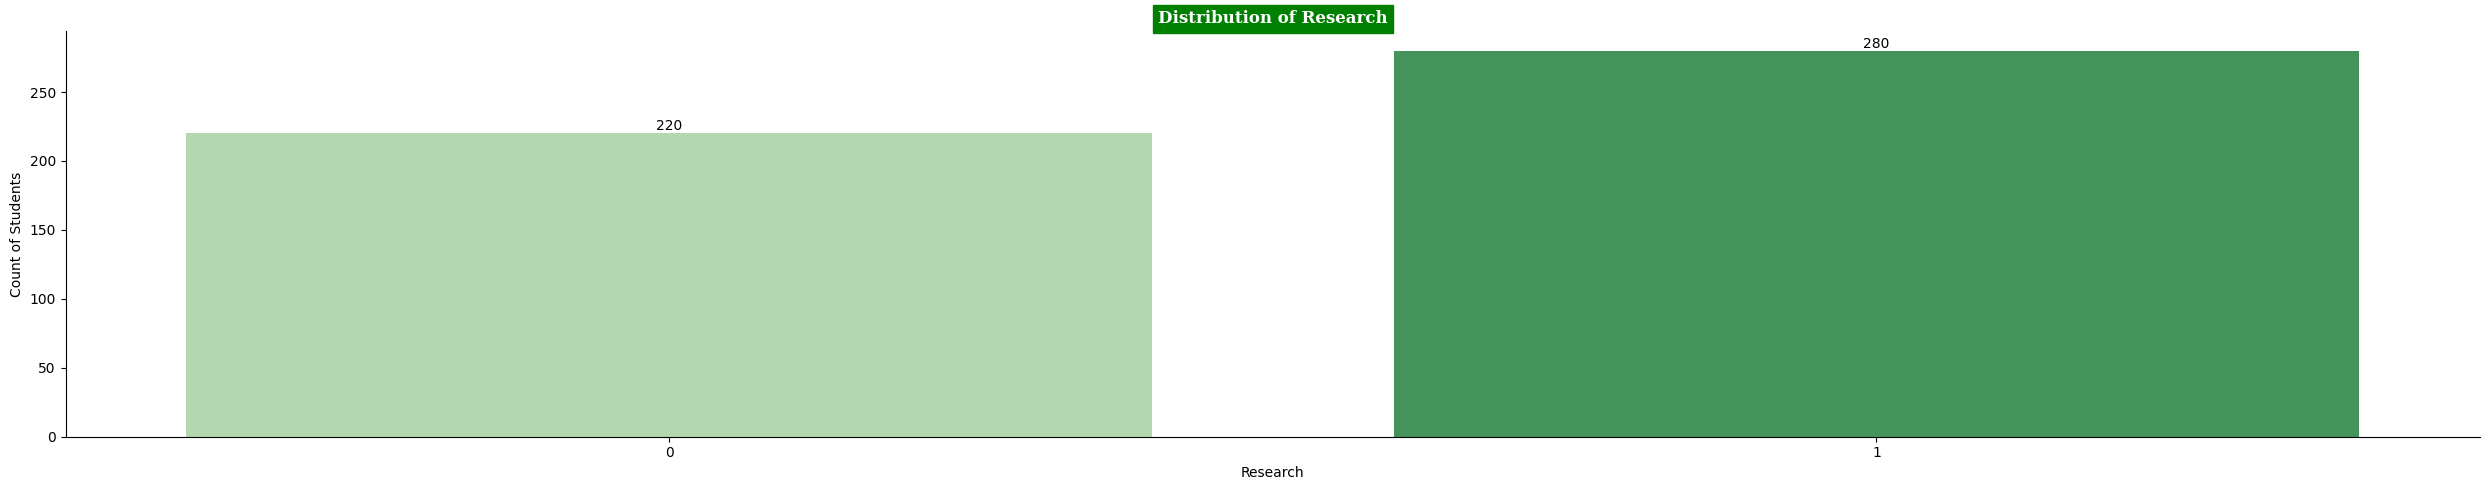

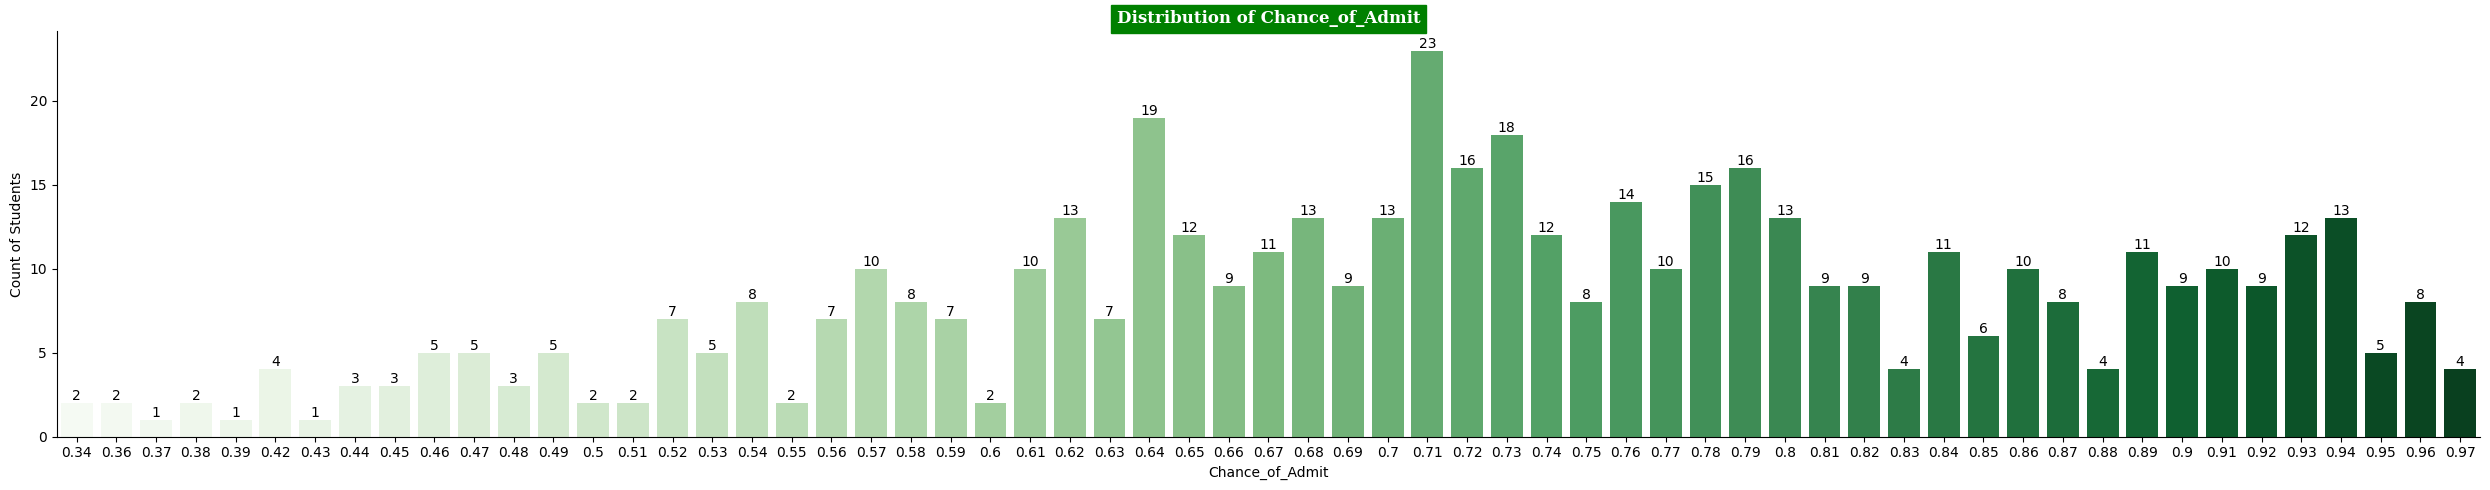

In [22]:
for col in df.columns:
    plt.figure(figsize=(25,5))
    plt.style.use('default')
    plt.style.use('seaborn-bright')
    b = sns.countplot(x=df[col],palette=cp)
    plt.title(f'Distribution of {col}',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    b.bar_label(b.containers[0], label_type='edge',fmt='%d')
    plt.xlabel(col)
    plt.ylabel('Count of Students')
    plt.tight_layout()
    sns.despine()
    plt.show();

In [23]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

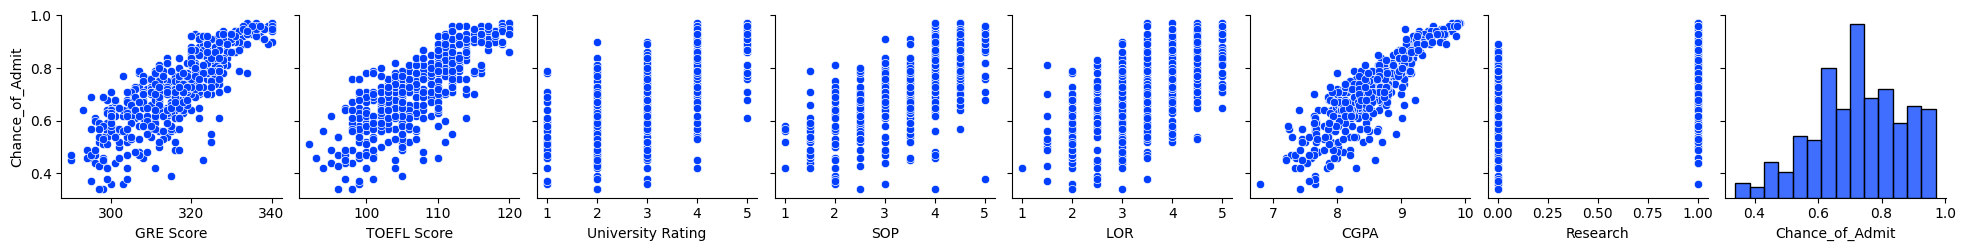

In [24]:
sns.pairplot(data=df, y_vars='Chance_of_Admit')
plt.show()

Insights:
Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit
While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact
We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

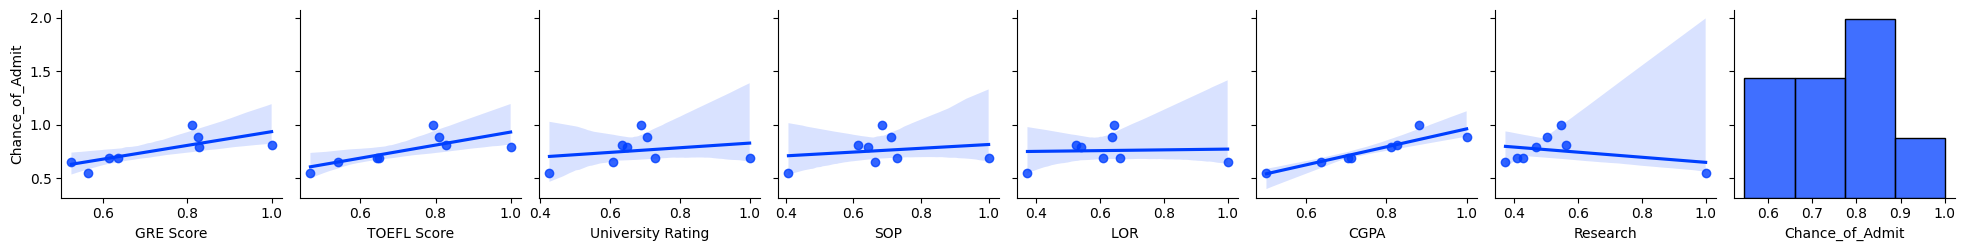

In [25]:
sns.pairplot(df.corr(),y_vars='Chance_of_Admit',kind= 'reg')

In [26]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

GRE Score


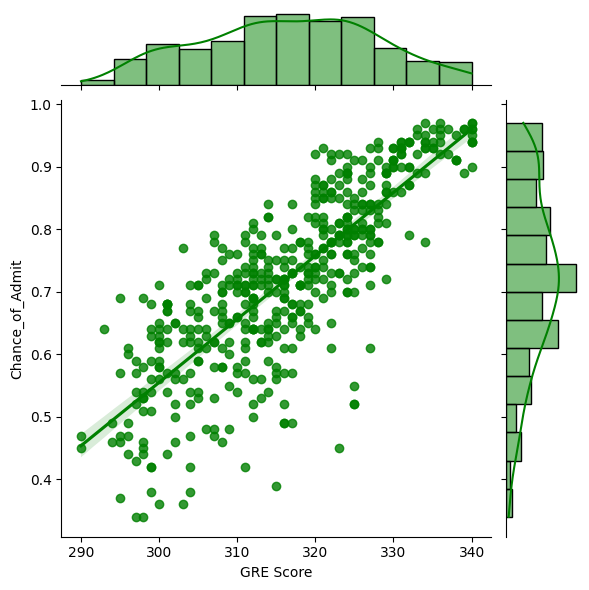

TOEFL Score


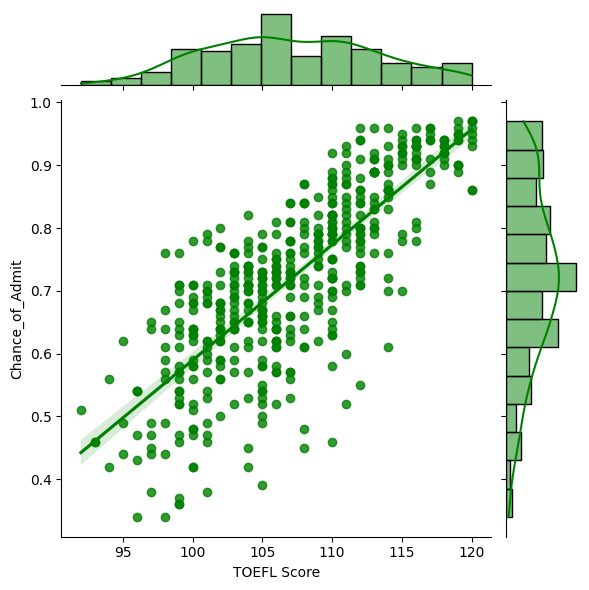

University Rating


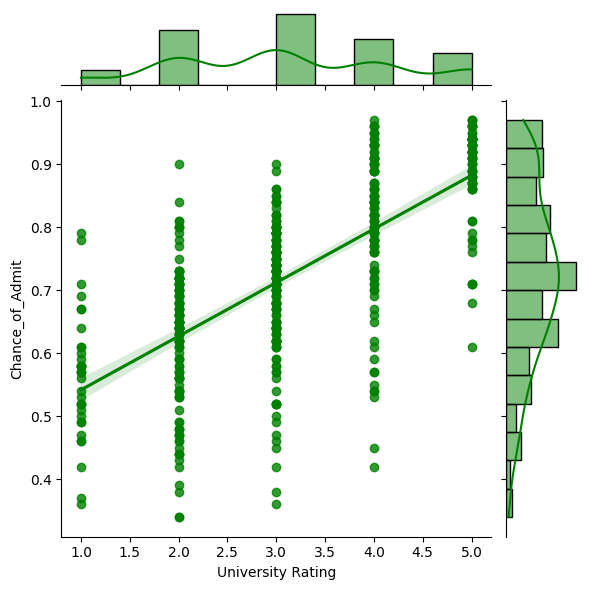

SOP


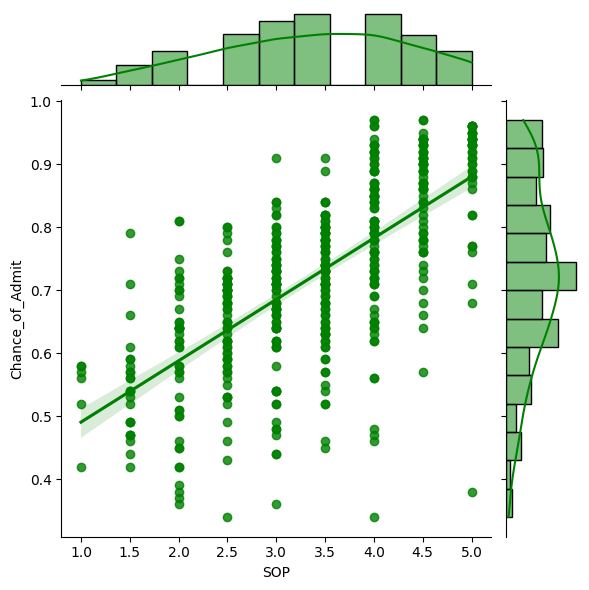

LOR 


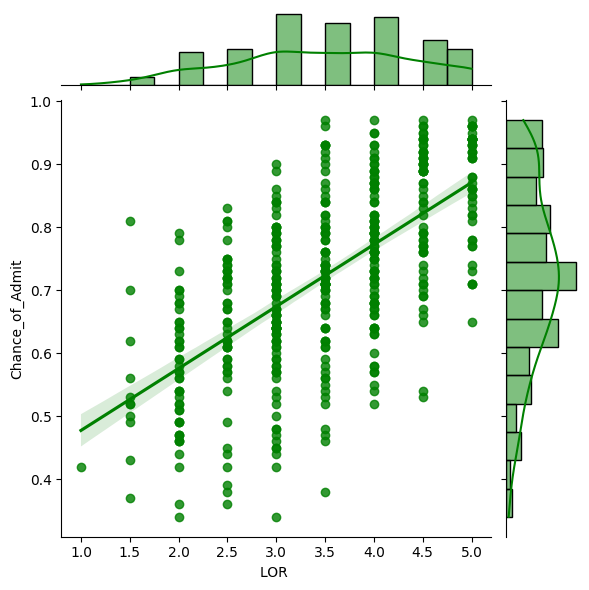

CGPA


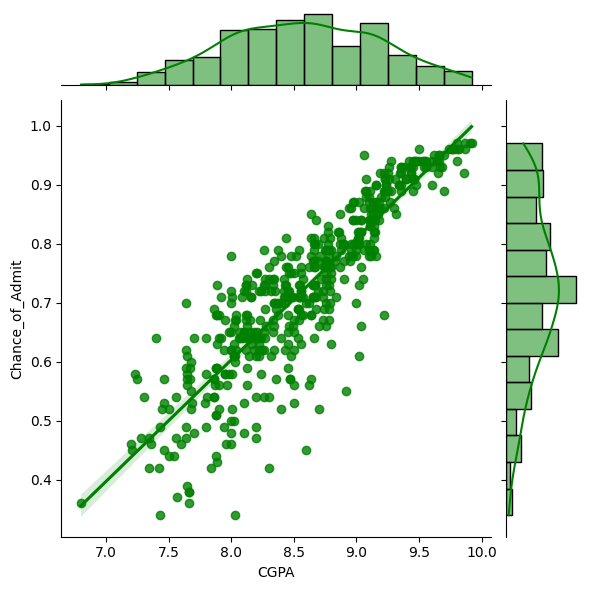

Research


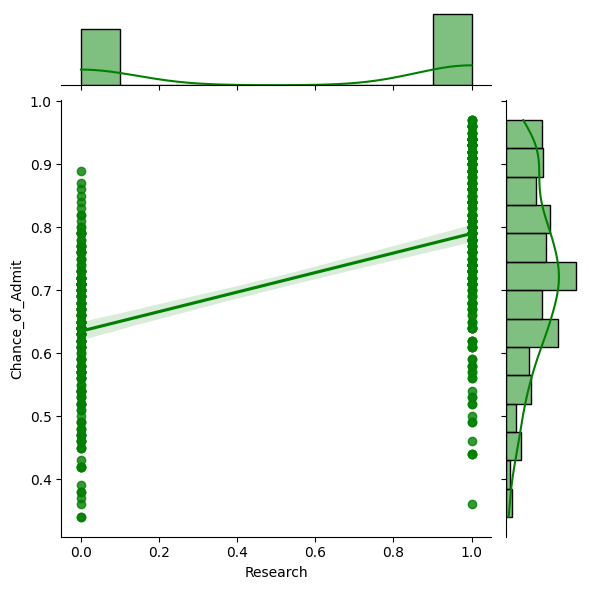

In [27]:
for col in df.columns[:-1]:
    print(col)
    sns.jointplot(data=df,x=df[col],y=df["Chance_of_Admit"],kind="reg",color='g')
    plt.show()

🏷️Insights:
with higher GRE score , there is high probability of getting an admition.

Students having high toefl score , has higher probability of getting admition .

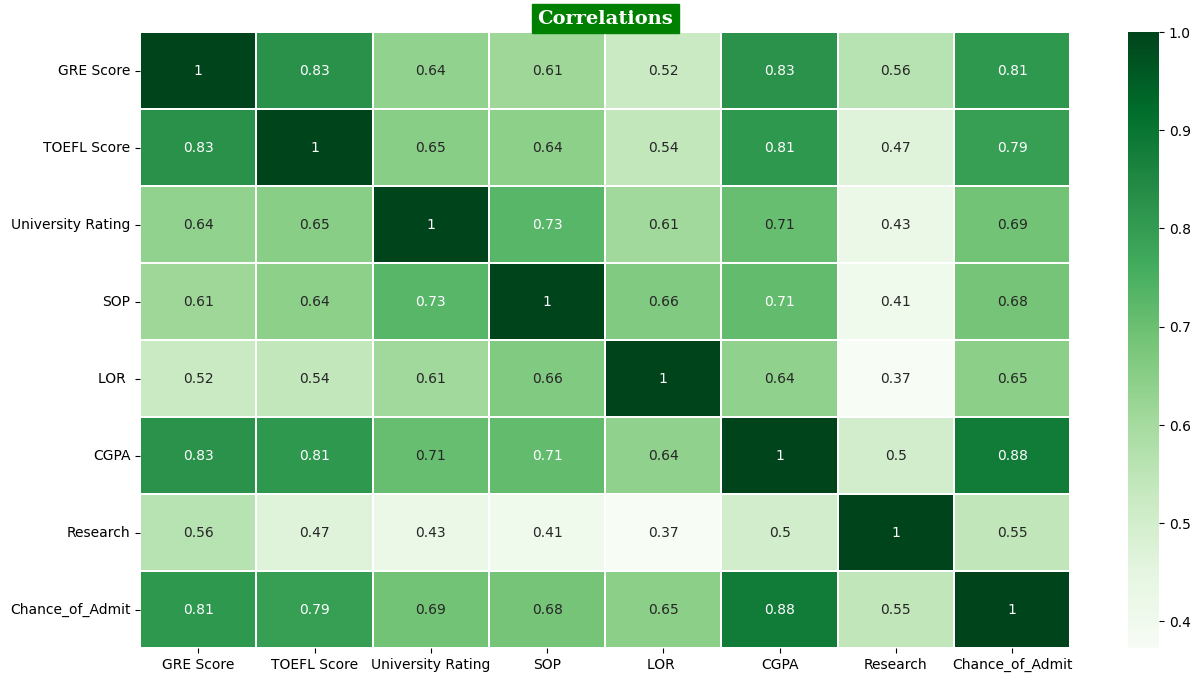

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens', linewidths = 0.1)#mask=np.triu(df.corr()))
plt.title(f'Correlations',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
plt.yticks(rotation=0)
plt.show()

Data Preprocessing - Standardization!

In [29]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [30]:
scaled_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582


Train-Test data split

In [31]:
x = scaled_df.iloc[:,:-1]
y = scaled_df.iloc[:,-1]
print(x.shape , y.shape)

(500, 7) (500,)


In [32]:
# Split the data into training and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


Linear Regression

In [33]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [34]:
# Predicting values for the training and test data
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

r2 score on train data :

In [35]:
r2_score(y_train,y_pred_train)

0.8210671369321554

In [36]:
lr_model.score(x_train,y_train)

0.8210671369321554

r2 score on test data :

In [37]:
r2_score(y_test,y_pred_test)

0.8188432567829628

In [38]:

lr_model.score(x_test,y_test)

0.8188432567829628

All the feature's coefficients and Intercept :

In [39]:
lr_model_weights = pd.DataFrame(lr_model.coef_.reshape(1,-1),columns=df.columns[:-1])
lr_model_weights["Intercept"] = lr_model.intercept_
lr_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.194823,0.129095,0.020812,0.012735,0.113028,0.482199,0.084586,0.007736


Insights:
CGPA,GRE,TOEFL scores have the highest weight
SOP, University rating, and research have the lowest weights
W0 - intercept is low

In [40]:
def model_evaluation(y_actual, y_forecast, model):
    n = len(y_actual)
    if len(model.coef_.shape)==1:
        p = len(model.coef_)
    else:
        p = len(model.coef_[0])
    MSE = np.round(mean_squared_error(y_true= y_actual,y_pred = y_forecast,squared=True),2)
    MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
    RMSE = np.round(mean_squared_error(y_true=y_actual,y_pred=y_forecast, squared=False),2)
    #rsme = np.sqrt(mean_squared_error(y_test,y_pred)
    r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
    adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
    return print(f"MSE: {MSE}\nMAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [41]:
model_evaluation(y_train.values, y_pred_train, lr_model)

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82


In [42]:
model_evaluation(y_test.values, y_pred_test, lr_model)

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81


Insights:
Since there is No difference in the loss scores of training and test data, we can conclude that there is NO overfitting of the model.

Linear Regression using OLS

In [43]:
new_x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, new_x_train)
results = model.fit()

# statstical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          3.41e-142
Time:                        11:02:25   Log-Likelihood:                -221.69
No. Observations:                 400   AIC:                             459.4
Df Residuals:                     392   BIC:                             491.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.02

Testing Assumptions of Linear Regression Model
No multicolinearity:

Multicollinearity check by VIF(Variance Inflation Factor) score.
Variables are dropped one-by-one till none has a VIF>5.
Mean of Residuals should be close to zero.
Linear relationship between independent & dependent variables.

This can be checked using the following methods:
Scatter plots
Regression plots
Pearson Correlation
Test for Homoscedasticity

Create a scatterplot of residuals against predicted values.
Perform a Goldfeld-Quandt test to check the presence of
Heteroscedasticity in the data.
If the obtained p-value > 0.05, there is no strong evidence of heteroscedasticity.
Normality of Residuals

Almost bell-shaped curve in residuals distribution.
Impact of Outliers

In [44]:
vif = pd.DataFrame()
vif['Variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variable,VIF
5,CGPA,4.653698
0,GRE Score,4.489201
1,TOEFL Score,3.665067
3,SOP,2.785753
2,University Rating,2.571847
4,LOR,1.977668
6,Research,1.517206


🏷️Insights:
As the Variance Inflation Factor(VIF) score is less than 5 for all the features we can say that there is no much multicolinearity between the features.

Mean of Residuals:

The mean of residuals represents the average of residual values in a regression model.

Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.

The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average.

However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values.

The mean of residuals being close to zero indicates that, on average, the predictions made by the linear regression model are accurate, with an equal balance of overestimations and underestimations. This is a desirable characteristic of a well-fitted regression model.

In [45]:
residuals = y_test.values - y_pred_test

In [46]:
residuals_train = y_train.values - y_pred_train
residuals_train.mean()

9.436895709313831e-18

In [47]:
residuals.mean()

-0.03867840379282768

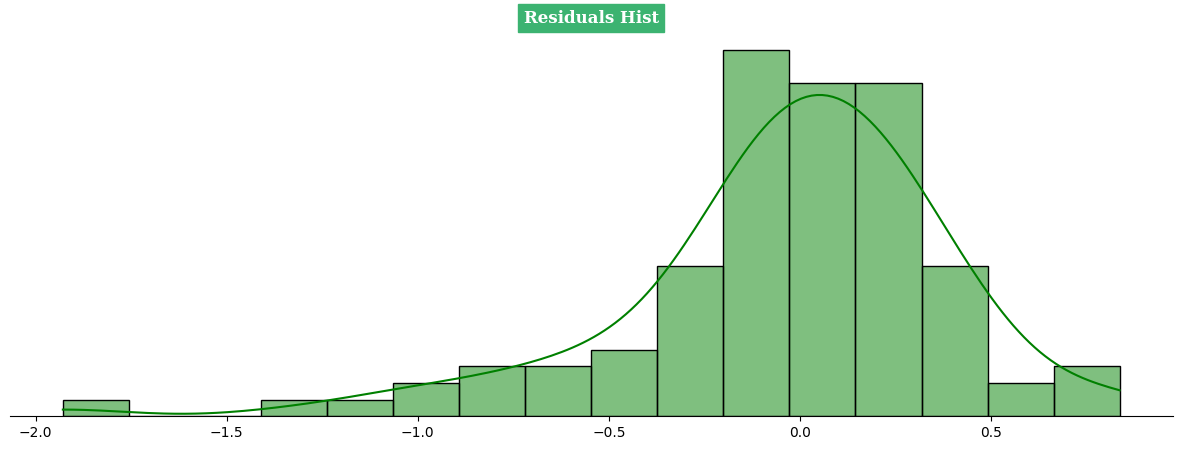

In [48]:
plt.figure(figsize=(15,5))
sns.histplot(residuals, kde= True,color='g')
plt.title('Residuals Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

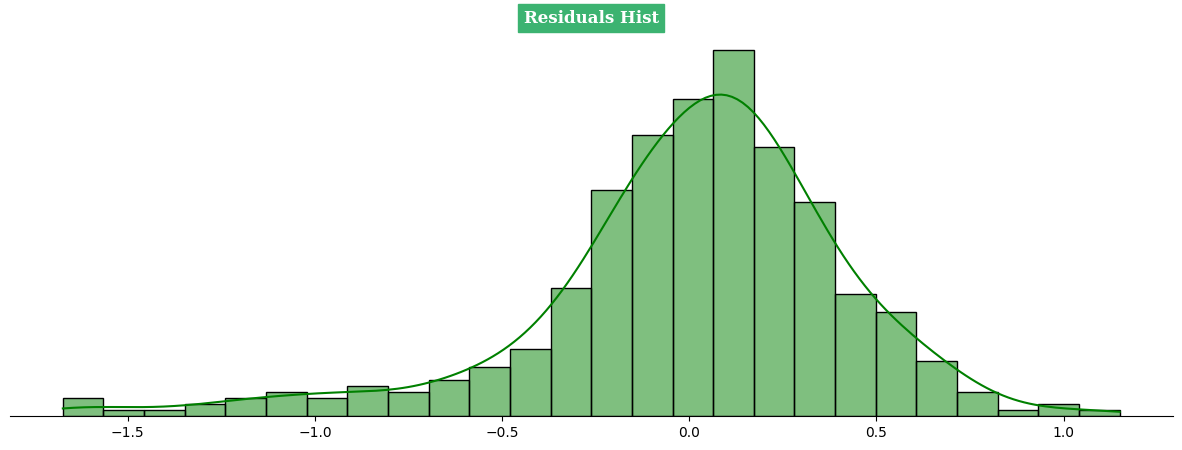

In [49]:
plt.figure(figsize=(15,5))
sns.histplot(residuals_train, kde= True,color='g')
plt.title('Residuals Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

Insights:
Since the mean of residuals is very close to 0, we can say that the model is UnBiased.

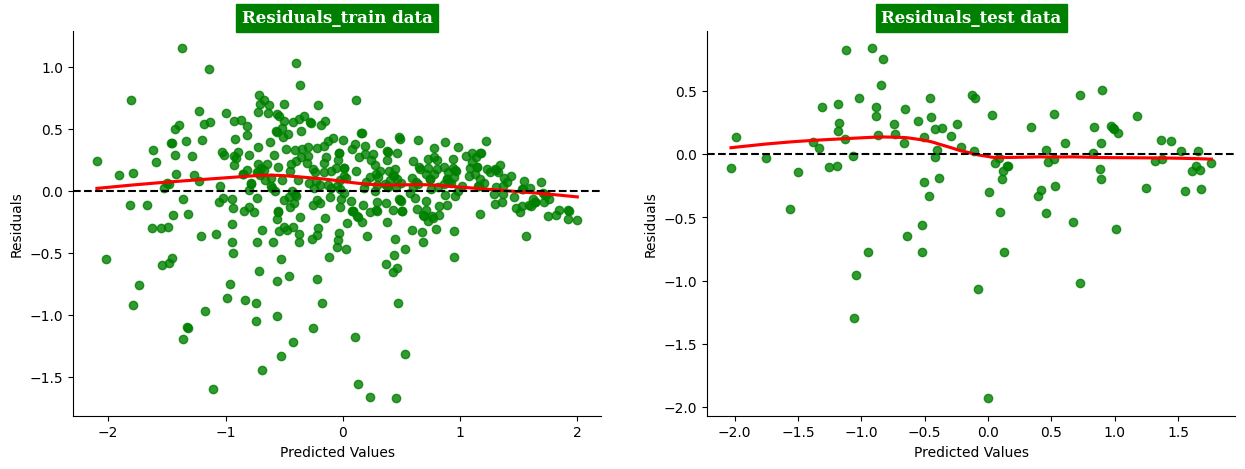

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Residuals_train data',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
sns.regplot(x=y_pred_train, y=residuals_train, lowess=True, color='g',line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.subplot(122)
plt.title('Residuals_test data',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
sns.regplot(x=y_pred_test, y=residuals, lowess=True,color='g' ,line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
sns.despine()
plt.show()

Insights:
From the Joint plot & pairplot in the graphical analysis, we can say that there is linear relationship between dependent variable and independent variables.

As we can observe, GRE Score, TOEFL Score and CGPA have a linear relationship with the Chance of Admit. Although GRE score and TOEFL score are more scattered, CGPA has a much more more linear relationship with the Chance of Admit.

In a linear regression model, the residuals are randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

Scatterplot of residuals with each independent variable to check for Homoscedasticity

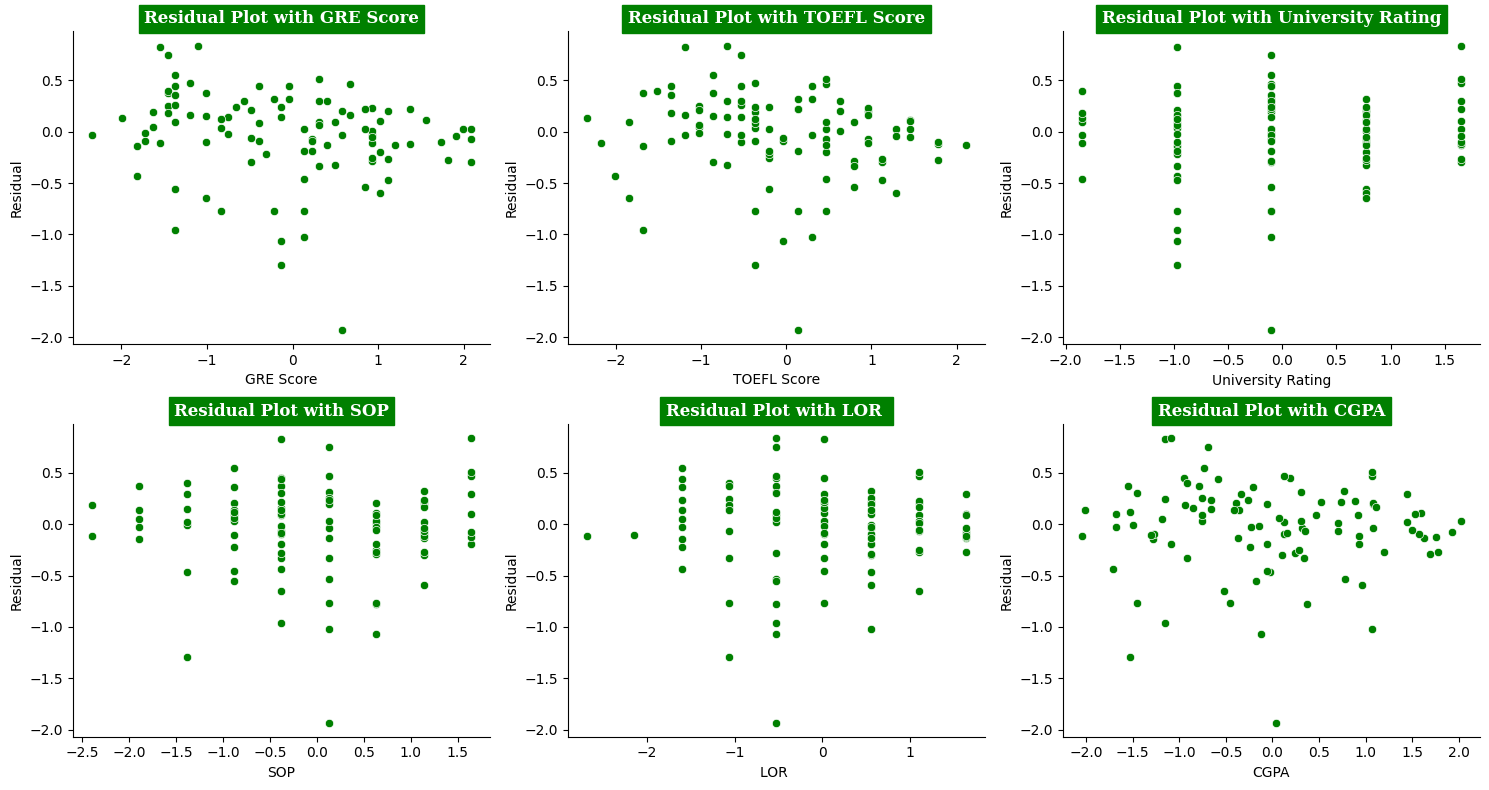

In [51]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(15,8))
i=1
for col in x_test.columns[:-1]:
    plt.subplot(2,3,i)
    sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)),color='g')
    plt.title(f'Residual Plot with {col}',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    plt.xlabel(col)
    plt.ylabel('Residual')
    i+=1

plt.tight_layout()
sns.despine()
plt.show();

In [53]:
ols_model = results
predicted = ols_model.predict()
residuals = ols_model.resid

**Breusch-Pagan test for Homoscedasticity**

Null Hypothesis -- H0 : Homoscedasticity is present in residuals.

Alternate Hypothesis -- Ha : Heteroscedasticity is present in residuals.
alpha : 0.05

In [54]:
bp_test = pd.DataFrame(sms.het_breuschpagan(residuals, ols_model.model.exog),
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])
bp_test

,value
Lagrange multiplier statistic,25.155866
p-value,0.000712
f-value,3.758171
f p-value,0.000588


🏷️Insights:
Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that Homoscedasticity is met.

Since the p-value is much lower than the alpha value, we can Reject the null hypothesis and conclude that Heteroscedasticity is present

Since the p-value is significantly less than the conventional significance level (e.g., 0.05), we reject the null hypothesis of homoscedasticity. This suggests that there is evidence of heteroscedasticity in the residuals, indicating that the variance of the residuals is not constant across all levels of the independent variables.

This violation of the homoscedasticity assumption may affect the validity of the linear regression model's results.

It's important to consider alternative modeling approaches or corrective measures to address this issue.

Normality of Residuals:

Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

To check for the normality of residuals, you can follow these steps:

Residual Histogram: Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve. If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.

Q-Q Plot (Quantile-Quantile Plot): This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.

Shapiro-Wilk Test: This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes.
>> Anderson-Darling or Jarque_Bera can also be done as data size increases.

Skewness and Kurtosis: Calculate the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.

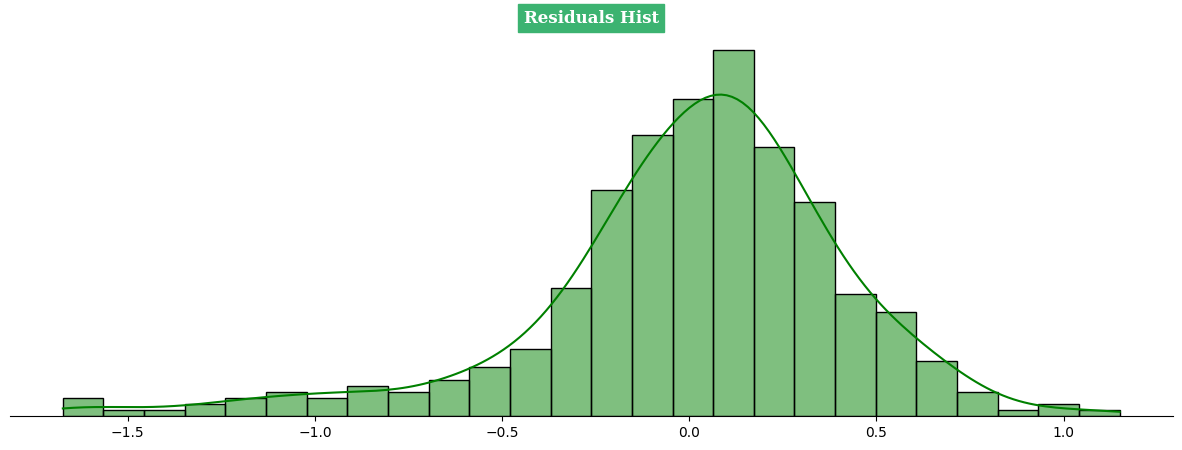

In [55]:
plt.figure(figsize=(15,5))
sns.histplot(residuals, kde= True,color='g')
plt.title('Residuals Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

<Figure size 1500x500 with 0 Axes>

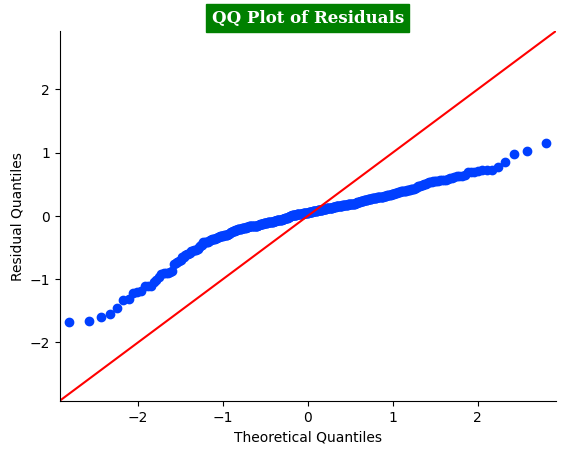

In [56]:
# QQ-Plot of residuals
plt.figure(figsize=(15,5))
sm.qqplot(residuals,line='45')
plt.title('QQ Plot of Residuals',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
plt.ylabel('Residual Quantiles')
sns.despine()
plt.show();

JARQUE BERA test:

In [57]:
jb_stat, jb_p_value = stats.jarque_bera(residuals)


print("Jarque-Bera Test Statistic:", jb_stat)
print("p-value:", jb_p_value)

if jb_p_value < 0.05:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")

Jarque-Bera Test Statistic: 190.09887364276915
p-value: 5.25477446043155e-42
Reject the null hypothesis: Residuals are not normally distributed.


Insights:
From the Histplot & kdeplot , we can see that the Residuals are left skewed and not perfectly normally distributed.

The QQ plot shows that residuals are slightly deviating from the straight diagonal , thus not Gaussian.

From Jarque Bera test , we conclude that the Residuals are Not Normally distributed.

Hence this assumption is not met.



**Lasso and Ridge Regression - L1 & L2 Regularization**

In [58]:
model_lasso = Lasso(alpha=0.45)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.45)

In [59]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

Ridge()

In [60]:
y_pred_train_ridge = model_ridge.predict(x_train)
y_pred_test_ridge = model_ridge.predict(x_test)

y_pred_train_lasso = model_lasso.predict(x_train)
y_pred_test_lasso = model_lasso.predict(x_test)

In [61]:
lasso_model_weights = pd.DataFrame(model_lasso.coef_.reshape(1,-1),columns=df.columns[:-1])
lasso_model_weights["Intercept"] = model_lasso.intercept_
lasso_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.019231,0.0,0.0,0.0,0.0,0.408647,0.0,0.013919


In [62]:
ridge_model_weights = pd.DataFrame(model_ridge.coef_.reshape(1,-1),columns=df.columns[:-1])
ridge_model_weights["Intercept"] = model_ridge.intercept_
ridge_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.195584,0.130073,0.021575,0.013802,0.113221,0.478123,0.084673,0.007726


In [63]:
print('Linear Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train, lr_model)
print('*'*25)
print('\nLinear Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test, lr_model)
print('---'*25)
print('\nRidge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_ridge, model_ridge)
print('*'*25)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_ridge, model_ridge)
print('---'*25)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_lasso, model_lasso)
print('*'*25)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_lasso, model_lasso)
print('---'*25)

Linear Regression Training Accuracy

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82
*************************

Linear Regression Test Accuracy

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81
---------------------------------------------------------------------------

Ridge Regression Training Accuracy

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82
*************************


Ridge Regression Test Accuracy

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81
---------------------------------------------------------------------------


Lasso Regression Training Accuracy

MSE: 0.43
MAE: 0.52
RMSE: 0.65
R2 Score: 0.57
Adjusted R2: 0.56
*************************


Lasso Regression Test Accuracy

MSE: 0.43
MAE: 0.51
RMSE: 0.65
R2 Score: 0.58
Adjusted R2: 0.55
---------------------------------------------------------------------------


observation:

While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data

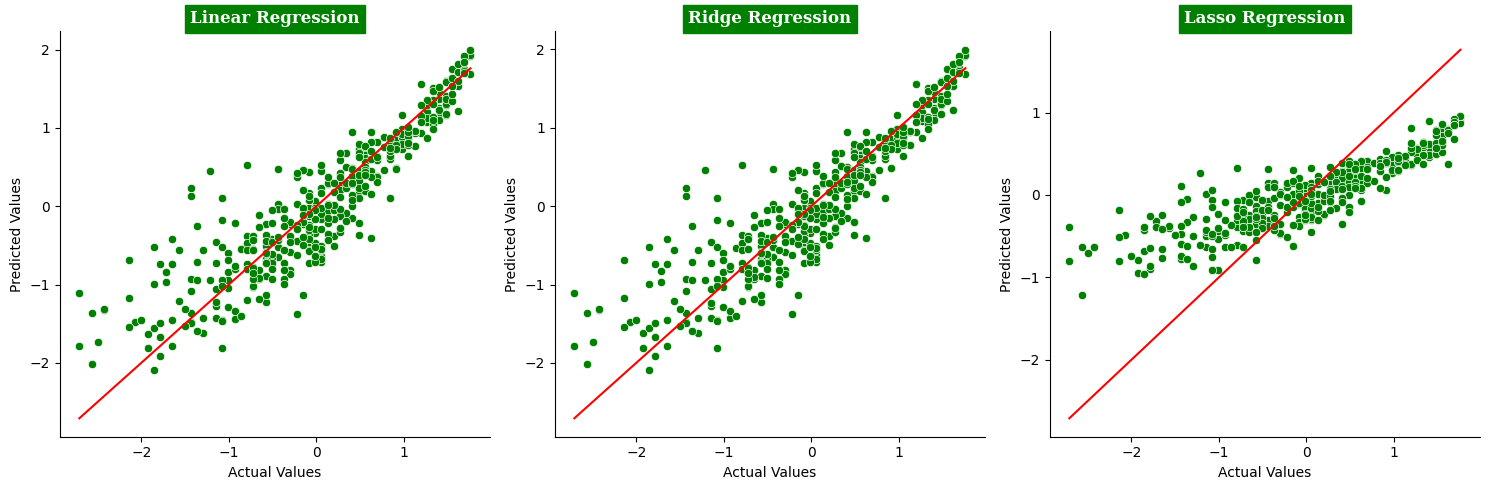

In [64]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_pred_train_ridge.reshape((-1,)), y_pred_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
plt.figure(figsize=(15,5))
i=1
for preds in predicted_values:
    plt.subplot(1,3,i)
    sns.scatterplot(x=actual_values, y=preds,color='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1],fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

Insights:

We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.

This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

**Regression Analysis Summary:**📣💭🤔

Upon conducting regression analysis, it's evident that CGPA emerges as the most influential feature in predicting admission chances.

Additionally, GRE and TOEFL scores also exhibit significant importance in the predictive model.

Following the initial regression model, a thorough check for multicollinearity was performed, revealing VIF scores consistently below 5, indicative of low multicollinearity among predictors.

Despite the absence of high multicollinearity, it's noteworthy that the residuals do not conform perfectly to a normal distribution. Furthermore, the residual plots indicate some level of heteroscedasticity.

Subsequent exploration involving regularized models such as Ridge and Lasso regression showcased comparable results to the Linear Regression Model.

Moreover, employing ElasticNet (L1+L2) regression yielded results consistent with the other regression models, further reinforcing the predictive capabilities of the features under consideration.

**Business Insights & Recommendations**⚡✴️

**Insights:**

Our analysis identified several key predictors strongly correlated with admission chances. Notably, GRE score, TOEFL score, and CGPA emerged as significant factors influencing admission probabilities.

Assessing multicollinearity revealed no significant issues, indicating the robustness of our model despite high correlations among predictors.

Both Linear Regression and Ridge Regression models exhibited promising performance, capturing up to 82% of the variance in admission probabilities.

Exploratory data analysis uncovered left-skewed distributions in admission probabilities and strong positive correlations between exam scores and admission chances.

Data Distribution:

Model Performance:

Multicollinearity Check:

Model Predictors:

**Recommendations:**

Encourage students to focus on improving GRE scores, CGPA, and the quality of Letters of Recommendation (LOR), as these factors significantly influence admission chances.

Collect a wider range of data beyond academic metrics to capture applicants' holistic profiles, including extracurricular achievements, personal statements, and diversity factors.

Additional Features:

Data Augmentation:

Feature Enhancement:

Given the strong correlation among CGPA, we can enrich the predictive model with additional diverse features such as Research, work experience, internships, or extracurricular activities.

By implementing these recommendations, we can further enhance our admissions process, providing valuable insights and support to both applicants and educational institutions.

